# Actividad TS02 – Curvas de Rango-Abundancia (Rank-Abundance Curves)

En esta actividad exploramos cómo las curvas de rango-abundancia permiten analizar la estructura de comunidades biológicas.  
La lógica es sencilla: ordenar las especies de más a menos abundantes y graficar su abundancia relativa frente a su rango.  


- **Riqueza**: cuántas especies hay (longitud de la curva).  
- **Equidad**: cómo se distribuyen las abundancias (pendiente de la curva).  

Las pendientes más pronunciadas sugieren dominancia de pocas especies; pendientes suaves reflejan comunidades más equitativas.  
Aquí trabajamos con el dataset de **Aedes spp.** en Isla del Carmen y graficamos por temporada (dry, norte, rainy).


Matriz de abundancia por temporada:
species  Ae.angustivitattus  Ae.egypti  Ae.fulvus  Ae.scapularis  Ae.serratus  \
season                                                                          
dry                       0          0          0              0            0   
norte                   240         64          0             14           55   
rainy                    28         21          2             13           64   

species  Ae.taeniorhynchus  
season                      
dry                   4163  
norte                10954  
rainy                 4385  


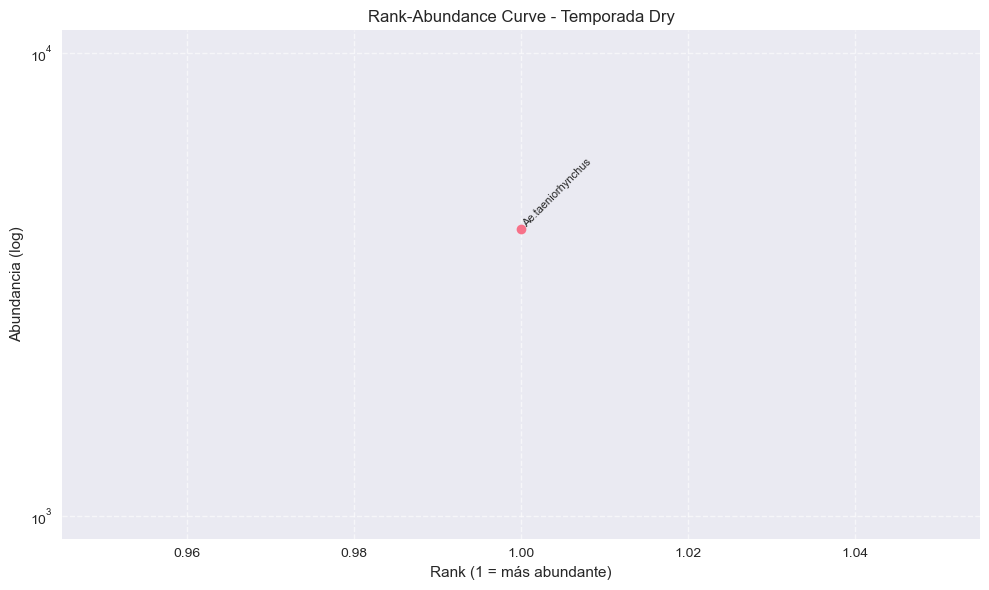

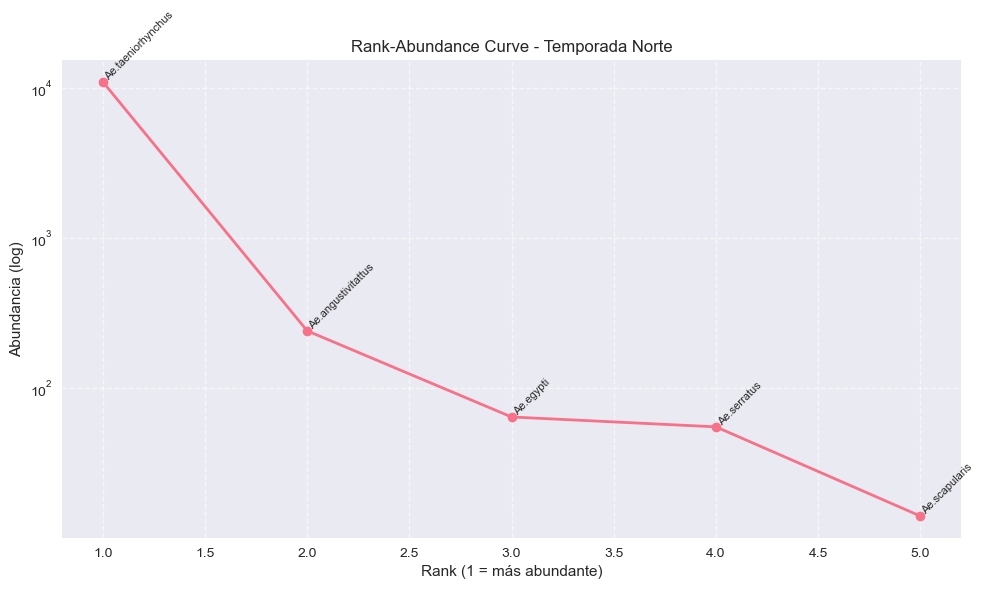

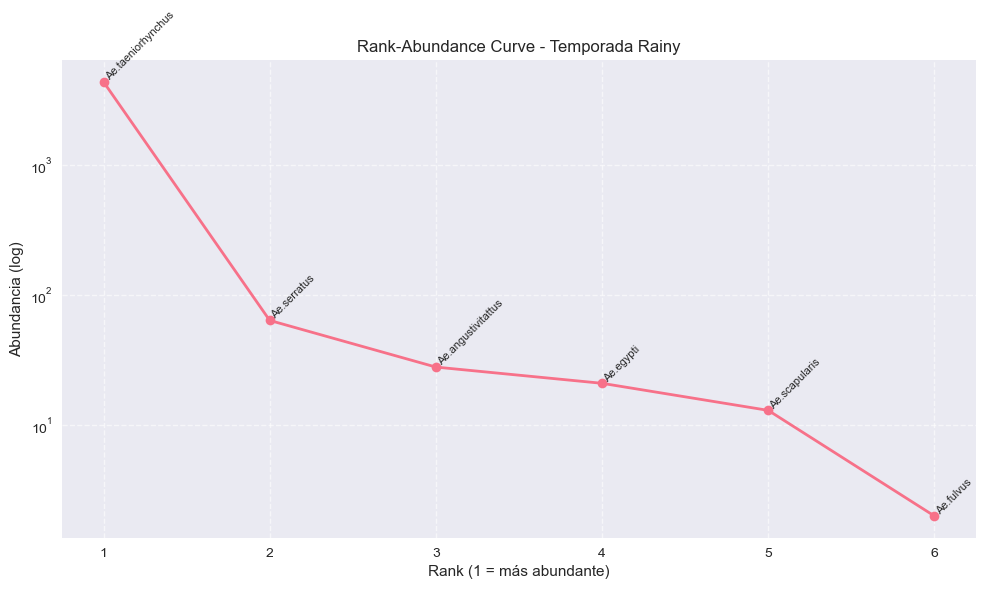

In [1]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_palette("husl")

# Cargar dataset
path = "../data/aedes.csv"
aedes_df = pd.read_csv(path)

# Agrupar por especie y temporada
df_grouped = aedes_df.groupby(['species', 'season'])['count'].sum().reset_index()
df_pivot = df_grouped.pivot(index='season', columns='species', values='count').fillna(0)

# Quitar especies sin registros
df_pivot = df_pivot.loc[:, (df_pivot > 0).any(axis=0)]
print("Matriz de abundancia por temporada:")
print(df_pivot.head())

# Función para graficar curva de rango-abundancia
def plot_rank_abundance(data, title):
    ranked = data.sort_values(ascending=False)
    ranked = ranked[ranked > 0]
    
    plot_df = pd.DataFrame({
        'Species': ranked.index,
        'Abundance': ranked.values,
        'Relative_abundance': ranked.values / ranked.values.sum()
    })
    plot_df['Rank'] = range(1, len(plot_df) + 1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(plot_df['Rank'], plot_df['Abundance'],
             marker='o', linestyle='-', linewidth=2, markersize=7)
    
    for i, row in plot_df.iterrows():
        plt.text(row['Rank'], row['Abundance'], row['Species'],
                 fontsize=8, ha='left', va='bottom', rotation=45)
    
    plt.title(f'Rank-Abundance Curve - {title}')
    plt.xlabel('Rank (1 = más abundante)')
    plt.ylabel('Abundancia (log)')
    plt.yscale('log')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Graficar curvas por temporada
for season in df_pivot.index:
    season_data = df_pivot.loc[season]
    plot_rank_abundance(season_data, f'Temporada {season.capitalize()}')


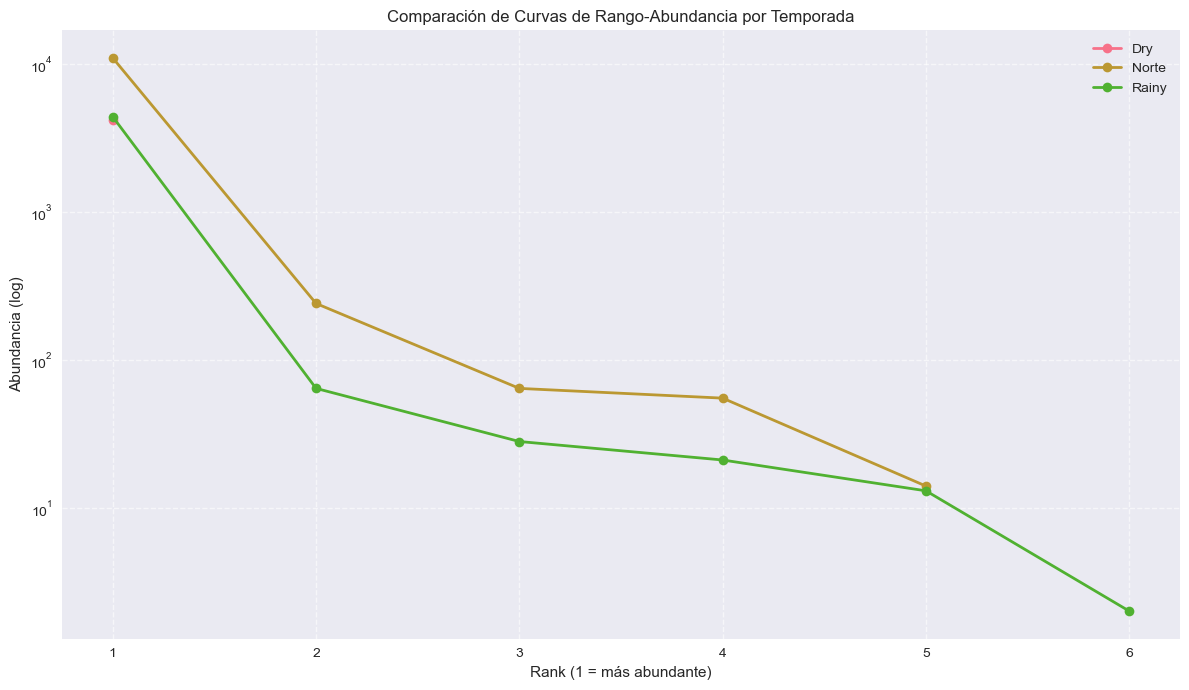

In [2]:
# Comparar todas las curvas en un solo plot
plt.figure(figsize=(12, 7))
for season in df_pivot.index:
    season_data = df_pivot.loc[season].sort_values(ascending=False)
    season_data = season_data[season_data > 0]
    plt.plot(range(1, len(season_data)+1), season_data.values,
             marker='o', linestyle='-', linewidth=2, label=f'{season.capitalize()}')

plt.title('Comparación de Curvas de Rango-Abundancia por Temporada')
plt.xlabel('Rank (1 = más abundante)')
plt.ylabel('Abundancia (log)')
plt.yscale('log')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
